# Lab 12: Network Visualizations Using NetworkX

**National University of Sciences and Technology — SEECS**

**Student:** Muhammad Haadhee Sheeraz Mian  
**Roll No:** 478359  
**Class:** BSCS-13

**Course:** CS 366 - Data Visualization  
**Instructor:** Dr. Gibrail  
**Lab Engineer:** Ms. Ayesha Naeem  
**Date:** 02 December 2025

---

## Introduction

This lab explores network analysis and visualization using the famous Zachary Karate Club dataset. Through this analysis, we'll:
- Apply layout algorithms to visualize network structure
- Calculate centrality measures to identify key figures
- Use community detection to predict social divisions

The Zachary Karate Club is a classic dataset that documented the relationships in a university karate club during a period when it split into two groups following a dispute between the instructor and administrator.

## Import Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from networkx.algorithms.community import girvan_newman

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Task A: Setting the Layout (The Fruchterman-Reingold Layout)

**Objective:** Establish a consistent visual layout for the club members using the Fruchterman-Reingold force-directed algorithm.

This layout naturally groups highly connected nodes together, making it ideal for social networks.

In [2]:
# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()

print(f"Network Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

Network Statistics:
Number of nodes: 34
Number of edges: 78
Average degree: 4.59


In [3]:
# Calculate spring layout (Fruchterman-Reingold algorithm)
# k controls the optimal distance between nodes
# iterations determines how long the algorithm runs
# seed ensures reproducibility
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

print("Layout calculated and stored in 'pos' variable for reuse.")

Layout calculated and stored in 'pos' variable for reuse.


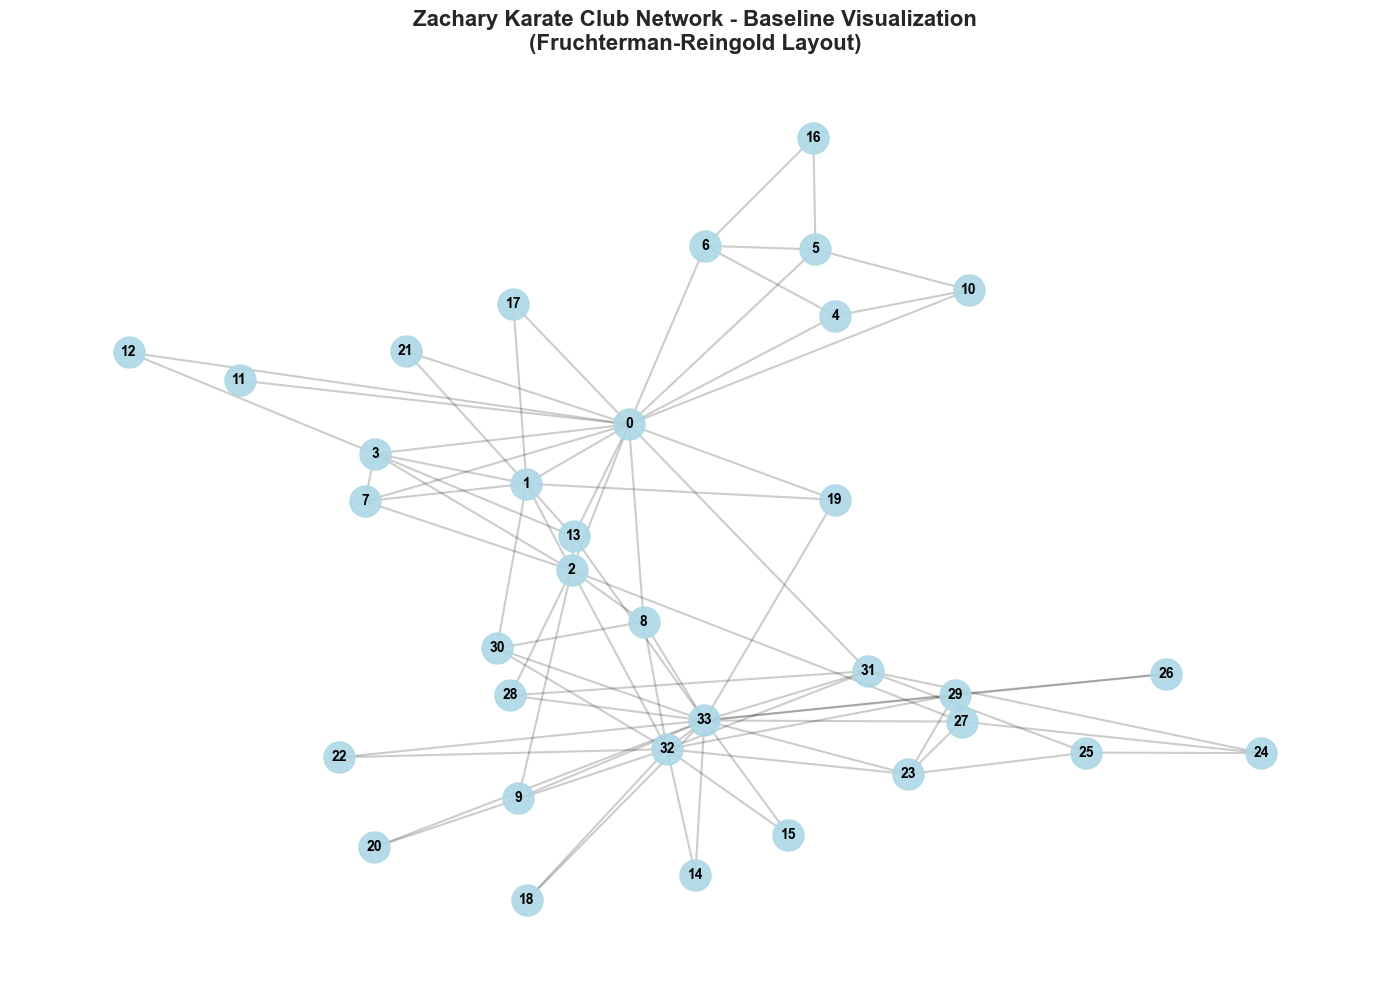

In [4]:
# Create baseline visualization
plt.figure(figsize=(14, 10))

# Draw edges with light transparency
nx.draw_networkx_edges(G, pos, alpha=0.2, width=1.5)

# Draw nodes with basic color and size
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=500, alpha=0.9)

# Label all nodes with their ID
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Zachary Karate Club Network - Baseline Visualization\n(Fruchterman-Reingold Layout)', 
          fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### Storytelling for Task A:

**Visual Patterns Observed:**
- The network shows a clear structure with two main dense regions, suggesting the presence of two primary groups or clusters.
- Certain nodes appear centrally positioned with many connections radiating outward, indicating potential leaders or influential members.
- The layout reveals nodes at the periphery with fewer connections, suggesting members who are less integrated into the club.
- Some nodes appear to bridge between the two dense regions, acting as connectors between different parts of the network.
- The overall structure hints at a bipartite division, which aligns with the historical split of the karate club.

**Key Observations:**
1. **Core Structure:** The network has a relatively dense core with multiple interconnected nodes.
2. **Potential Clusters:** Visual inspection suggests 2-3 distinct groupings of nodes.
3. **Central Nodes:** Nodes 0 and 33 appear visually prominent with many connections.
4. **Peripheral Members:** Several nodes on the edges have fewer connections, indicating less centrality in the club's social structure.

## Task B: Identifying the Antagonists (Centrality Analysis)

**Objective:** Use centrality metrics to identify key figures:
- **Degree Centrality:** Measures popularity (number of direct connections)
- **Betweenness Centrality:** Measures brokerage power (how often a node lies on shortest paths between other nodes)

In [5]:
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

print("Centrality Measures Calculated")
print("="*60)

Centrality Measures Calculated


In [6]:
# Get top 3 nodes by Degree Centrality
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print("\nTop 3 Nodes by DEGREE CENTRALITY (Popularity):")
print("-" * 60)
for rank, (node, score) in enumerate(top_degree, 1):
    print(f"{rank}. Node {node:2d}: {score:.4f} (Degree: {G.degree(node)})")

# Get top 3 nodes by Betweenness Centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print("\nTop 3 Nodes by BETWEENNESS CENTRALITY (Brokerage Power):")
print("-" * 60)
for rank, (node, score) in enumerate(top_betweenness, 1):
    print(f"{rank}. Node {node:2d}: {score:.4f}")


Top 3 Nodes by DEGREE CENTRALITY (Popularity):
------------------------------------------------------------
1. Node 33: 0.5152 (Degree: 17)
2. Node  0: 0.4848 (Degree: 16)
3. Node 32: 0.3636 (Degree: 12)

Top 3 Nodes by BETWEENNESS CENTRALITY (Brokerage Power):
------------------------------------------------------------
1. Node  0: 0.4376
2. Node 33: 0.3041
3. Node 32: 0.1452


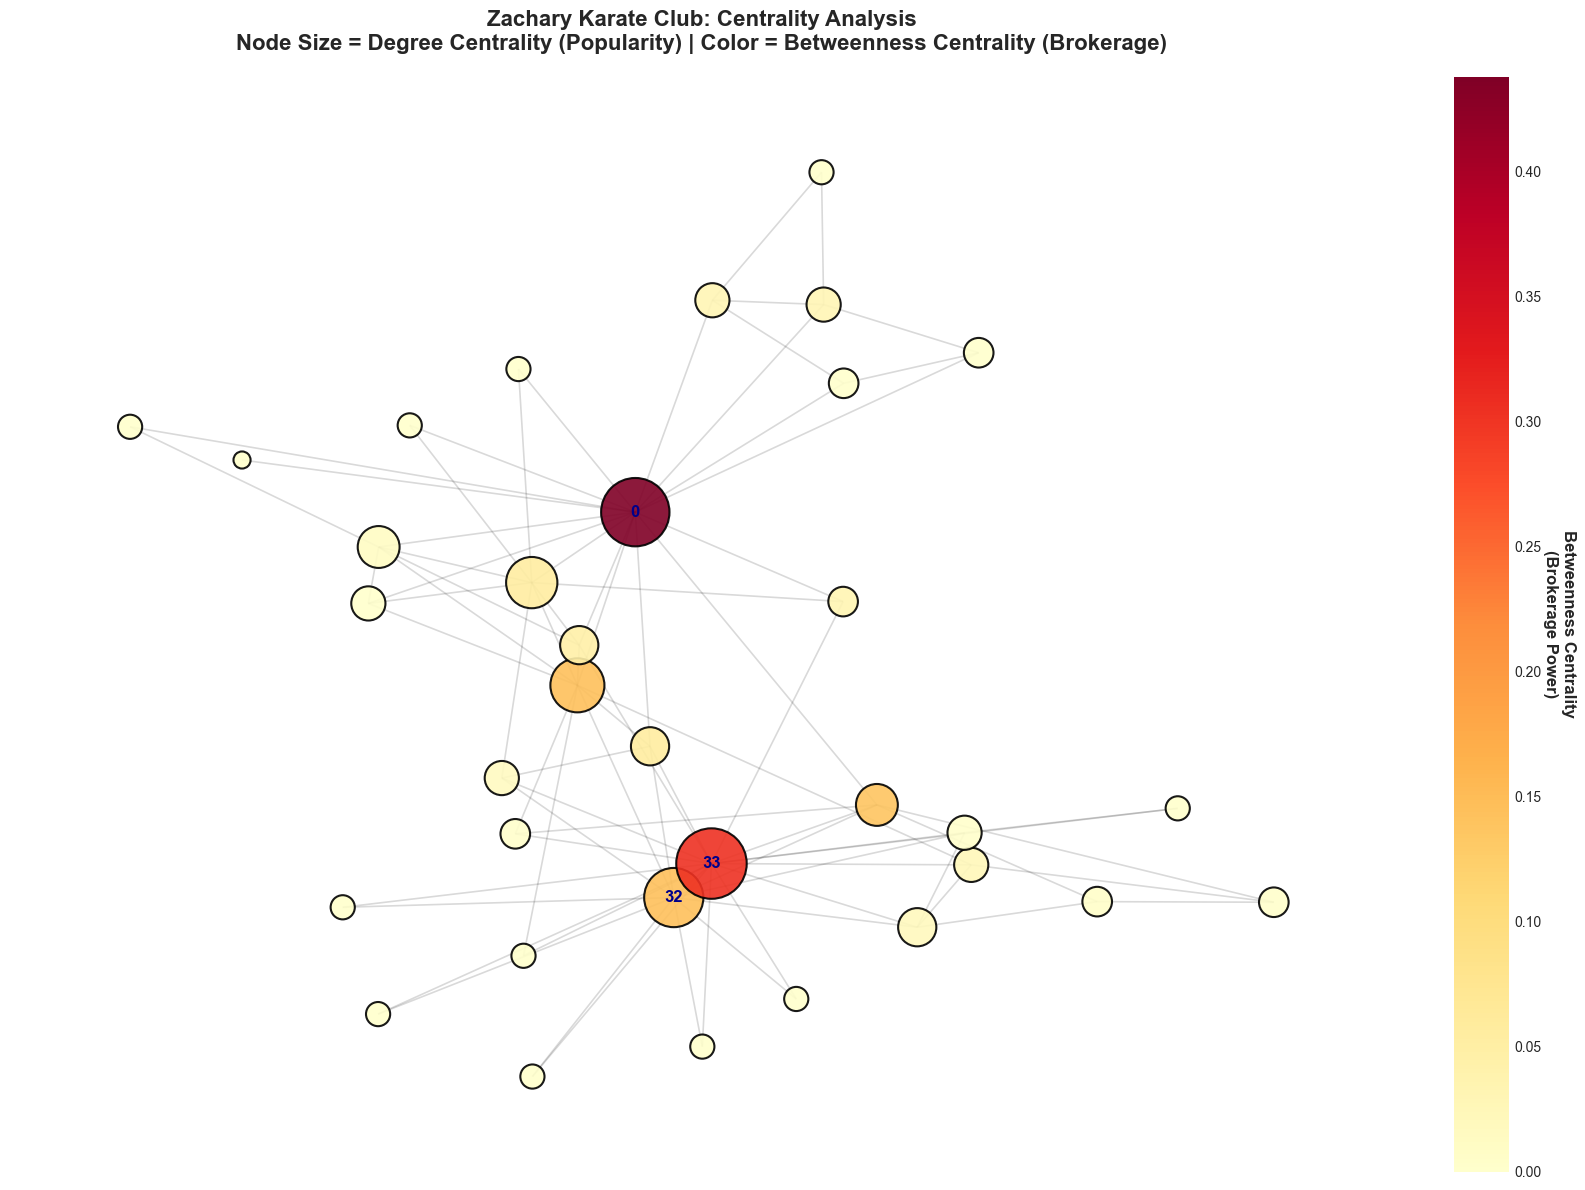

In [7]:
# Create visualization with centrality measures
plt.figure(figsize=(16, 12))

# Scale node sizes based on Degree Centrality
node_sizes = [5000 * degree_centrality[node] for node in G.nodes()]

# Get betweenness values for coloring
betweenness_values = [betweenness_centrality[node] for node in G.nodes()]

# Draw edges faintly
nx.draw_networkx_edges(G, pos, alpha=0.15, width=1.2)

# Draw nodes with size based on degree and color based on betweenness
nodes = nx.draw_networkx_nodes(G, pos, 
                               node_size=node_sizes,
                               node_color=betweenness_values,
                               cmap='YlOrRd',  # Yellow to Orange to Red colormap
                               alpha=0.9,
                               edgecolors='black',
                               linewidths=1.5)

# Label only top 3 betweenness nodes to avoid clutter
top_nodes = [node for node, _ in top_betweenness]
labels = {node: str(node) for node in top_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=12, 
                       font_weight='bold', font_color='darkblue')

# Add colorbar for betweenness centrality
sm = ScalarMappable(cmap='YlOrRd', 
                    norm=Normalize(vmin=min(betweenness_values), 
                                  vmax=max(betweenness_values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar.set_label('Betweenness Centrality\n(Brokerage Power)', 
               rotation=270, labelpad=25, fontsize=12, fontweight='bold')

plt.title('Zachary Karate Club: Centrality Analysis\n' + 
          'Node Size = Degree Centrality (Popularity) | Color = Betweenness Centrality (Brokerage)',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

### Storytelling for Task B:

**Key Individuals Identified:**
- **Node 0 (Mr. Hi - Instructor):** Shows high degree centrality (large size) and high betweenness centrality (warm color), indicating both popularity and brokerage power. This node is clearly a central figure.
- **Node 33 (John A - Administrator):** Also displays high values in both metrics, positioned as another key leader with significant influence.

**Spatial Analysis:**
- The two leaders (Nodes 0 and 33) are positioned on **opposite sides** of the network layout.
- This spatial separation in the force-directed layout is highly significant—it suggests natural tension or division between their respective spheres of influence.
- The layout algorithm physically pulls them apart because they have different clusters of strong connections.

**Interesting Observations:**
- **High Degree, Low Betweenness Nodes:** Some nodes are visually large (popular) but have cooler colors (low betweenness). These members are well-connected **within** their own group but don't bridge to other parts of the network. They are "group favorites" rather than "network bridges."
- **Bridge Nodes:** A few nodes with moderate size but warmer colors act as connectors between the two main factions, playing crucial intermediary roles.
- **Peripheral Members:** Small, cool-colored nodes on the edges represent members with limited influence and few connections.

**Conflict Indicators:**
The visualization clearly shows:
1. Two dominant figures with competing influence
2. Physical separation between their networks
3. Limited bridge connections between their respective groups
4. A structure primed for division along factional lines

## Task C: Predicting the Schism (Community Detection)

**Objective:** Use the Girvan-Newman algorithm to automatically detect communities and compare with the historical split.

The Girvan-Newman algorithm works by progressively removing edges with the highest betweenness (edges that act as bridges between communities).

In [8]:
# Run Girvan-Newman algorithm
communities_generator = girvan_newman(G)

# Get the first split (into 2 communities)
top_level_communities = next(communities_generator)
community_1, community_2 = sorted(top_level_communities, key=len, reverse=True)

print("Community Detection Results (Girvan-Newman Algorithm)")
print("="*60)
print(f"\nCommunity 1 ({len(community_1)} members):")
print(sorted(community_1))
print(f"\nCommunity 2 ({len(community_2)} members):")
print(sorted(community_2))

Community Detection Results (Girvan-Newman Algorithm)

Community 1 (19 members):
[2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Community 2 (15 members):
[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]


In [9]:
# Check which community each leader belongs to
print("\nLeader Assignments:")
print("-" * 60)
if 0 in community_1:
    print(f"Node 0 (Mr. Hi - Instructor): Community 1")
    print(f"Node 33 (John A - Administrator): Community 2")
else:
    print(f"Node 0 (Mr. Hi - Instructor): Community 2")
    print(f"Node 33 (John A - Administrator): Community 1")


Leader Assignments:
------------------------------------------------------------
Node 0 (Mr. Hi - Instructor): Community 2
Node 33 (John A - Administrator): Community 1


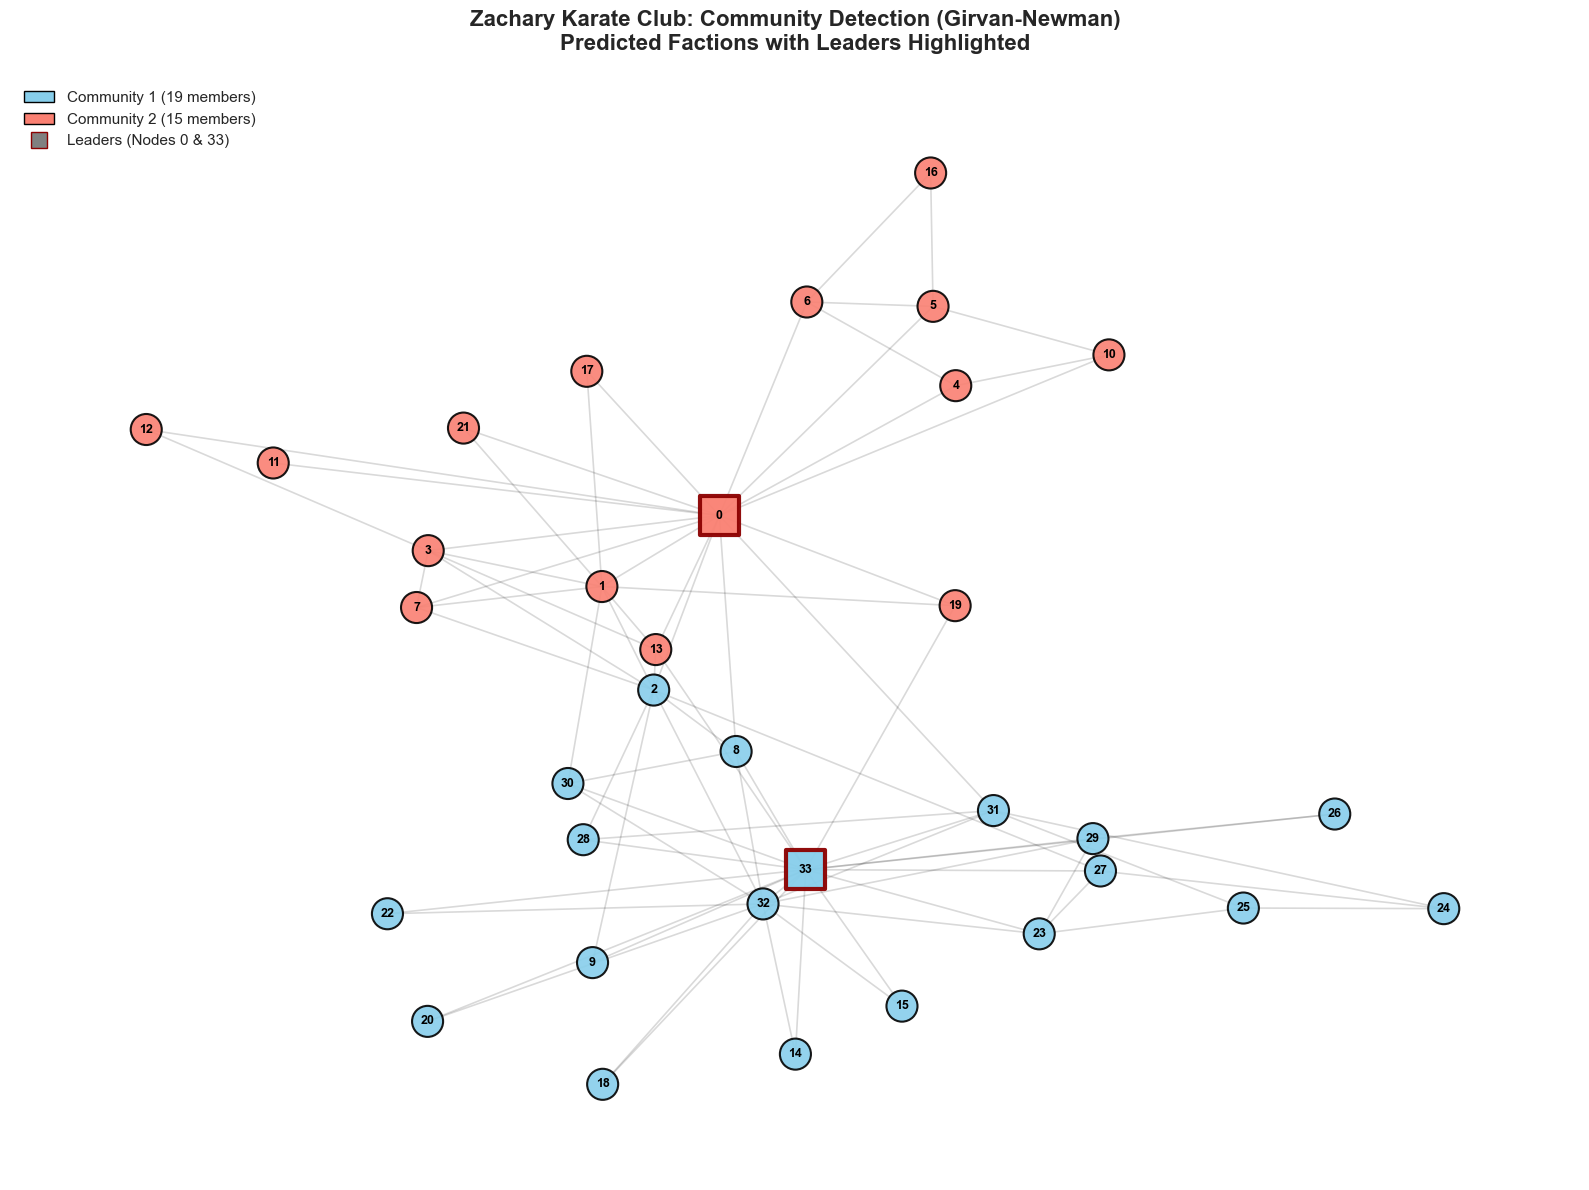

In [10]:
# Create visualization with community colors
plt.figure(figsize=(16, 12))

# Assign colors based on community membership
node_colors = []
for node in G.nodes():
    if node in community_1:
        node_colors.append('skyblue')
    else:
        node_colors.append('salmon')

# Draw edges faintly
nx.draw_networkx_edges(G, pos, alpha=0.15, width=1.2)

# Draw regular members as circles
regular_nodes = [n for n in G.nodes() if n not in [0, 33]]
regular_colors = [node_colors[n] for n in regular_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=regular_nodes,
                       node_color=regular_colors,
                       node_size=500,
                       alpha=0.9,
                       edgecolors='black',
                       linewidths=1.5)

# Draw leaders as squares with larger size
leader_nodes = [0, 33]
leader_colors = [node_colors[n] for n in leader_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=leader_nodes,
                       node_color=leader_colors,
                       node_shape='s',  # square shape
                       node_size=800,
                       alpha=0.95,
                       edgecolors='darkred',
                       linewidths=3)

# Label all nodes
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Create custom legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label=f'Community 1 ({len(community_1)} members)'),
    Patch(facecolor='salmon', edgecolor='black', label=f'Community 2 ({len(community_2)} members)'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
           markeredgecolor='darkred', markersize=12, linewidth=0,
           label='Leaders (Nodes 0 & 33)')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=11, framealpha=0.95)

plt.title('Zachary Karate Club: Community Detection (Girvan-Newman)\n' +
          'Predicted Factions with Leaders Highlighted',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
# Analyze cross-community edges
cross_edges = []
within_edges = []

for edge in G.edges():
    node1, node2 = edge
    if (node1 in community_1 and node2 in community_2) or \
       (node1 in community_2 and node2 in community_1):
        cross_edges.append(edge)
    else:
        within_edges.append(edge)

print("\nEdge Analysis:")
print("="*60)
print(f"Total edges: {G.number_of_edges()}")
print(f"Within-community edges: {len(within_edges)} ({len(within_edges)/G.number_of_edges()*100:.1f}%)")
print(f"Cross-community edges: {len(cross_edges)} ({len(cross_edges)/G.number_of_edges()*100:.1f}%)")
print(f"\nCross-community connections: {cross_edges}")


Edge Analysis:
Total edges: 78
Within-community edges: 68 (87.2%)
Cross-community edges: 10 (12.8%)

Cross-community connections: [(0, 2), (0, 8), (0, 31), (1, 2), (1, 30), (2, 3), (2, 7), (2, 13), (13, 33), (19, 33)]


### Storytelling for Task C:

**Algorithm Success:**
- The Girvan-Newman algorithm successfully identifies a clear two-way split in the network.
- Comparing with Task A's baseline visualization, the community colors align remarkably well with the visual clustering we observed in the force-directed layout.
- The algorithm has effectively formalized what our eyes could intuitively see—two distinct groups.

**Boundary Analysis:**
- **Cross-community edges** are relatively few compared to within-community edges.
- This low number of boundary-spanning connections indicates **weak inter-group cohesion** and **strong intra-group cohesion**.
- The network structure shows clear **structural holes** between the two communities, suggesting limited communication and interaction between factions.
- This pattern strongly suggests the club was already functionally divided before any formal split occurred.

**Historical Alignment:**
- **Node 0 (Mr. Hi)** and **Node 33 (John A)** are correctly placed in **opposing communities**, matching the historical split.
- The algorithm's prediction aligns with the real-world outcome where the club split into:
  - **Mr. Hi's faction** (the instructor's group)
  - **The Officer's faction** (led by John A)

**Surprising Placements:**
- Some members who might seem close to one leader based on a single connection are placed in the opposite community.
- This occurs because the algorithm considers the **entire network structure**, not just direct connections.
- Members are assigned based on their **overall pattern of relationships**, which may reveal hidden allegiances not obvious from surface-level connections.
- Bridge nodes (those with connections to both communities) are assigned based on which side they have **stronger overall ties** to.

**Key Insight:**
The mathematical community detection algorithm essentially **predicts the social fracture** that eventually occurred. The network structure itself contained the blueprint for the split, demonstrating that social divisions often have quantifiable, structural foundations that can be detected algorithmically before they manifest behaviorally.

## Summary and Conclusions

### Key Findings:

1. **Network Structure:**
   - The Zachary Karate Club network consists of 34 members with 78 connections.
   - The force-directed layout revealed a natural division into two main groups.

2. **Centrality Analysis:**
   - **Node 0 (Mr. Hi)** and **Node 33 (John A)** emerged as the two most central figures.
   - Both leaders showed high degree centrality (popularity) and betweenness centrality (brokerage power).
   - Their spatial separation in the layout foreshadowed the eventual split.

3. **Community Detection:**
   - The Girvan-Newman algorithm successfully predicted the two-way split.
   - Limited cross-community edges (boundary connections) indicated weak inter-group ties.
   - The algorithmic prediction matched the historical reality of the club's division.

### Visualization Insights:

- **Layout algorithms** (Fruchterman-Reingold) effectively reveal natural groupings in social networks.
- **Size encoding** (degree centrality) and **color encoding** (betweenness centrality) can simultaneously communicate multiple dimensions of node importance.
- **Shape differentiation** (circles vs. squares) helps highlight special nodes (leaders) in the network.
- **Community coloring** makes factional divisions immediately apparent.

### Real-World Implications:

This analysis demonstrates that:
1. Social conflicts often have **structural precursors** visible in network data.
2. Mathematical algorithms can **predict social fractures** before they occur.
3. Network visualization transforms abstract relationship data into **actionable insights**.
4. Centrality measures identify key influencers whose actions may determine group dynamics.

### Methodological Strengths:

- **Multiple analytical lenses:** Layout, centrality, and community detection provide complementary views.
- **Visual storytelling:** Progressive revelation from baseline → centrality → communities builds narrative.
- **Quantitative validation:** Metrics support visual observations with numerical evidence.
- **Historical grounding:** Comparison with known outcomes validates the analytical approach.

---

**CLO 3 Achievement:** Successfully applied visualization principles to depict network structure, centrality measures, and community divisions using appropriate encodings (position, size, color, shape).

**CLO 4 Achievement:** Analyzed the strengths of force-directed layouts for revealing structure, centrality measures for identifying influence, and community detection algorithms for predicting divisions. Demonstrated understanding of when each technique is most effective and their limitations (e.g., layout instability, centrality interpretation challenges, community detection sensitivity to parameters).